<h2><b>TASK 5

<B>Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [19]:
data = pd.read_csv(r"D:\PRODIGY\PRODIGY_DS_05\US_Accidents_March23.csv")

In [20]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [21]:
list(data.columns)

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [22]:
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

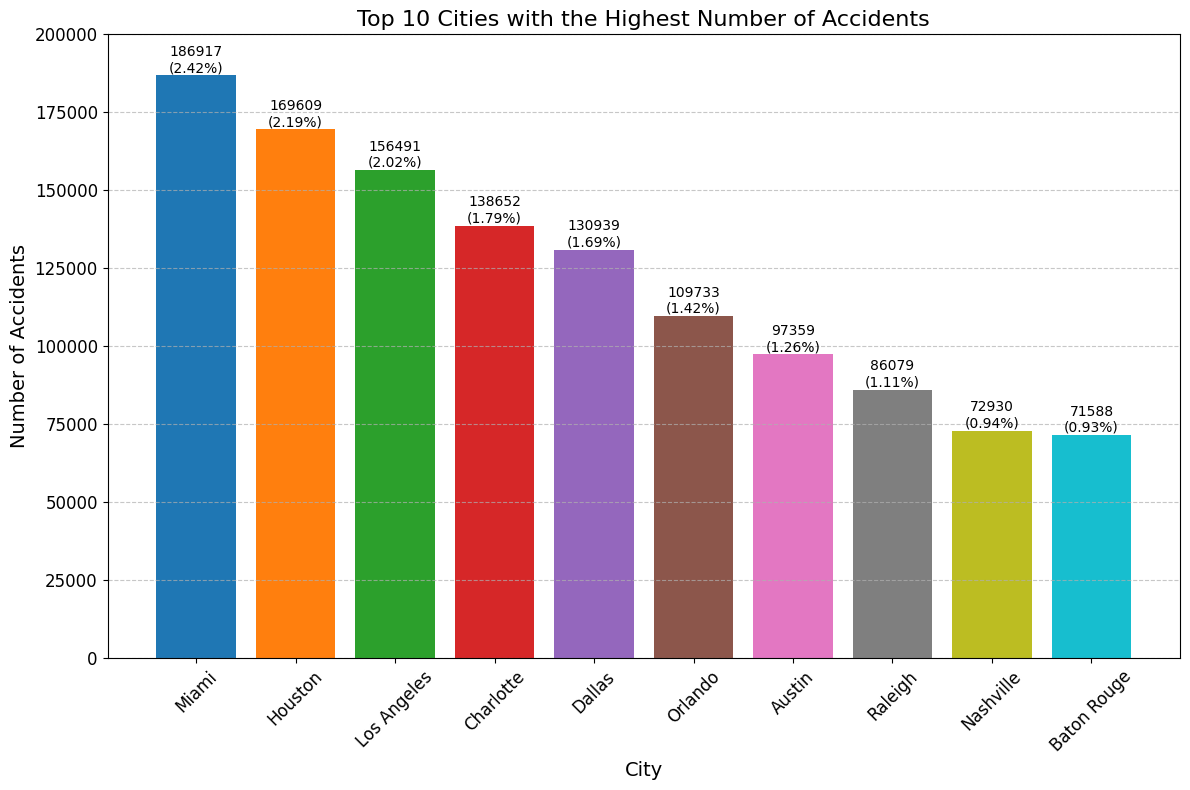

In [23]:
city_counts = data['City'].value_counts()
top_10_cities = city_counts.nlargest(10)
total_accidents = city_counts.sum()
top_10_percentages = (top_10_cities / total_accidents) * 100
colors = cm.tab10(range(10))

plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_cities.index, top_10_cities, color=colors)

for bar, count, percentage in zip(bars, top_10_cities, top_10_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{count}\n({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Cities with the Highest Number of Accidents', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,200000)

plt.show()

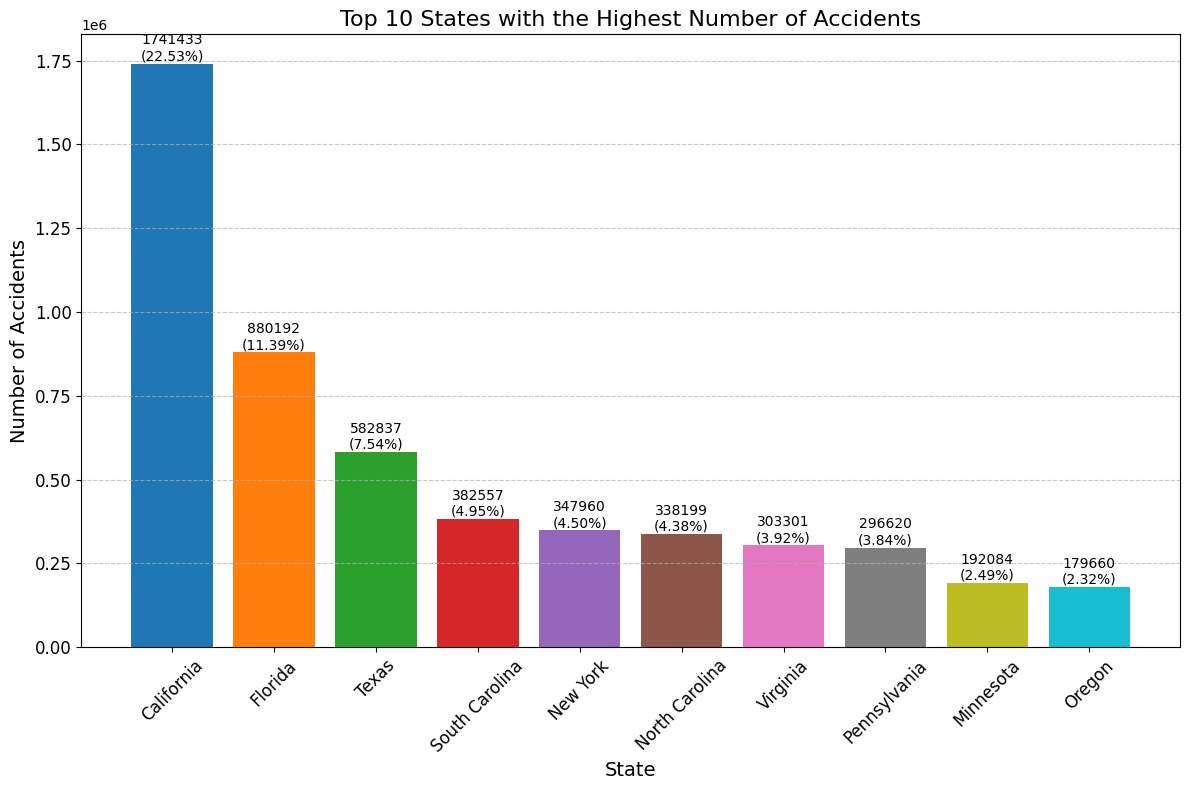

In [24]:
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

state_counts = data['State'].value_counts()
top_10_state = state_counts.nlargest(10)
total_accidents = state_counts.sum()
top_10_percentages = (top_10_state / total_accidents) * 100
top_10_state_full_names = top_10_state.index.map(us_states)

colors = cm.tab10(range(10))

plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_state_full_names, top_10_state, color=colors)

for bar, count, percentage in zip(bars, top_10_state, top_10_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{count}\n({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Top 10 States with the Highest Number of Accidents', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

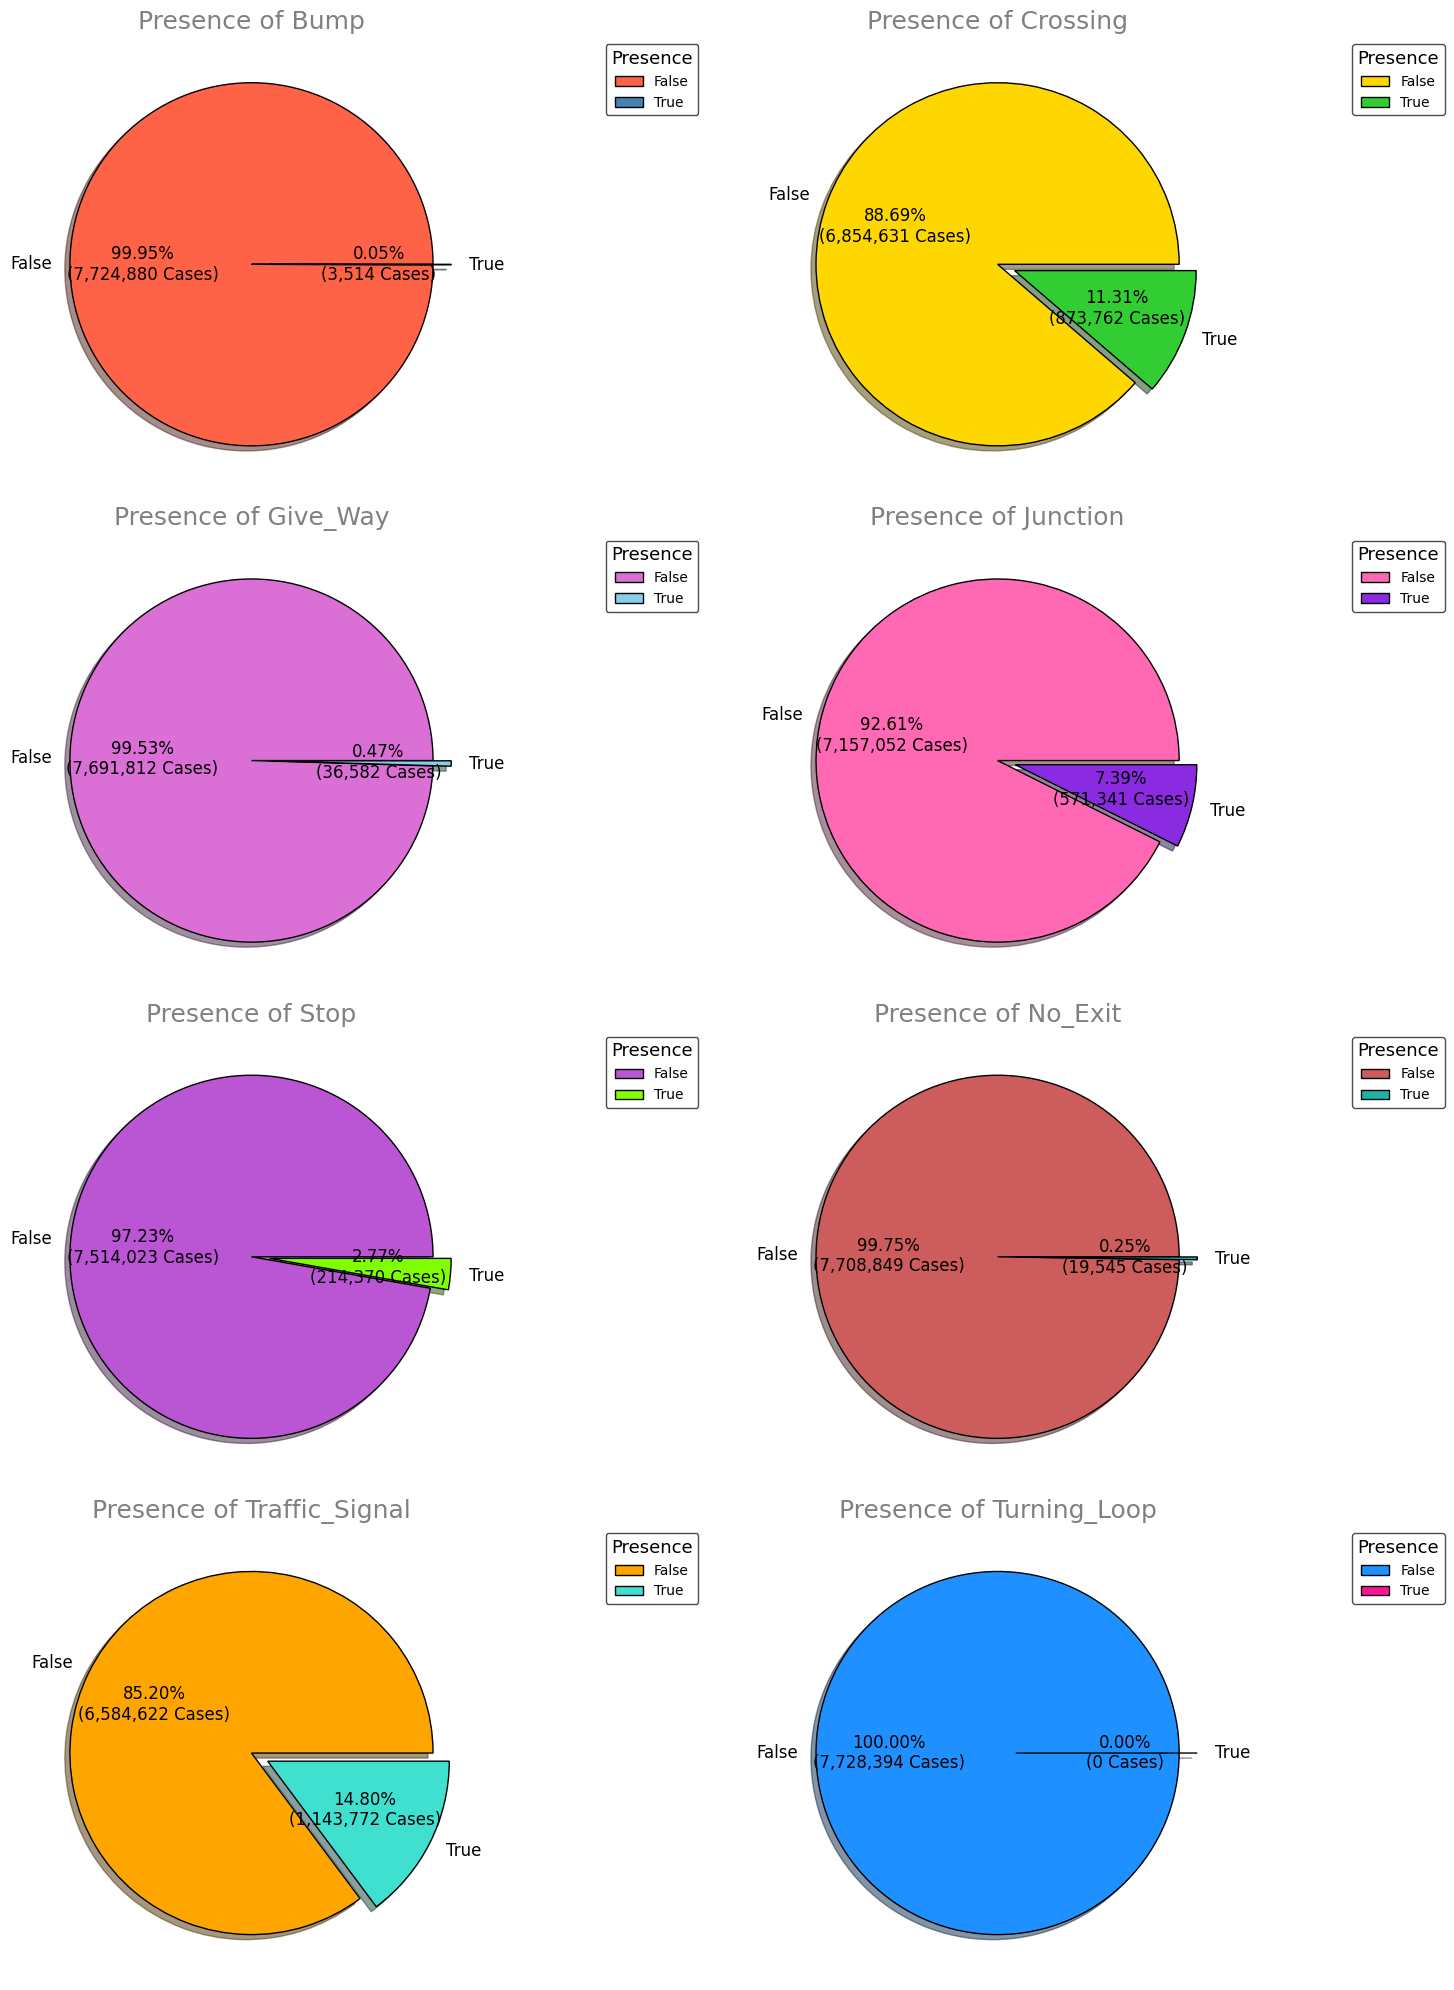

In [25]:
road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']

colors = [
    ('#FF6347', '#4682B4'), ('#FFD700', '#32CD32'), ('#DA70D6', '#87CEEB'),
    ('#FF69B4', '#8A2BE2'), ('#BA55D3', '#7FFF00'), ('#CD5C5C', '#20B2AA'),
    ('#FFA500', '#40E0D0'), ('#1E90FF', '#FF1493')
]

def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axs = axs.flatten()

for idx, ax in enumerate(axs):
    road_condition = road_conditions[idx]
    size = list(data[road_condition].value_counts())

    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']

    wedges, texts, autotexts = ax.pie(size, labels=labels, colors=colors[idx],
                                      autopct=lambda pct: func(pct, size), labeldistance=1.1,
                                      textprops={'fontsize': 12}, explode=[0, 0.1], shadow=True,
                                      wedgeprops={'edgecolor': 'black'})

    title = f'Presence of {road_condition}'
    ax.set_title(title, fontsize=18, color='grey')

    ax.legend(wedges, labels, title="Presence", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize=10, title_fontsize='13', frameon=True, framealpha=0.7, edgecolor='black')

    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('black')

plt.tight_layout()
plt.show()

C:\Users\SAMRIDHI DANGAYACH\AppData\Local\Temp\ipykernel_17768\1196395646.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=visibility_counts.index, y=visibility_counts.values, palette=colors)


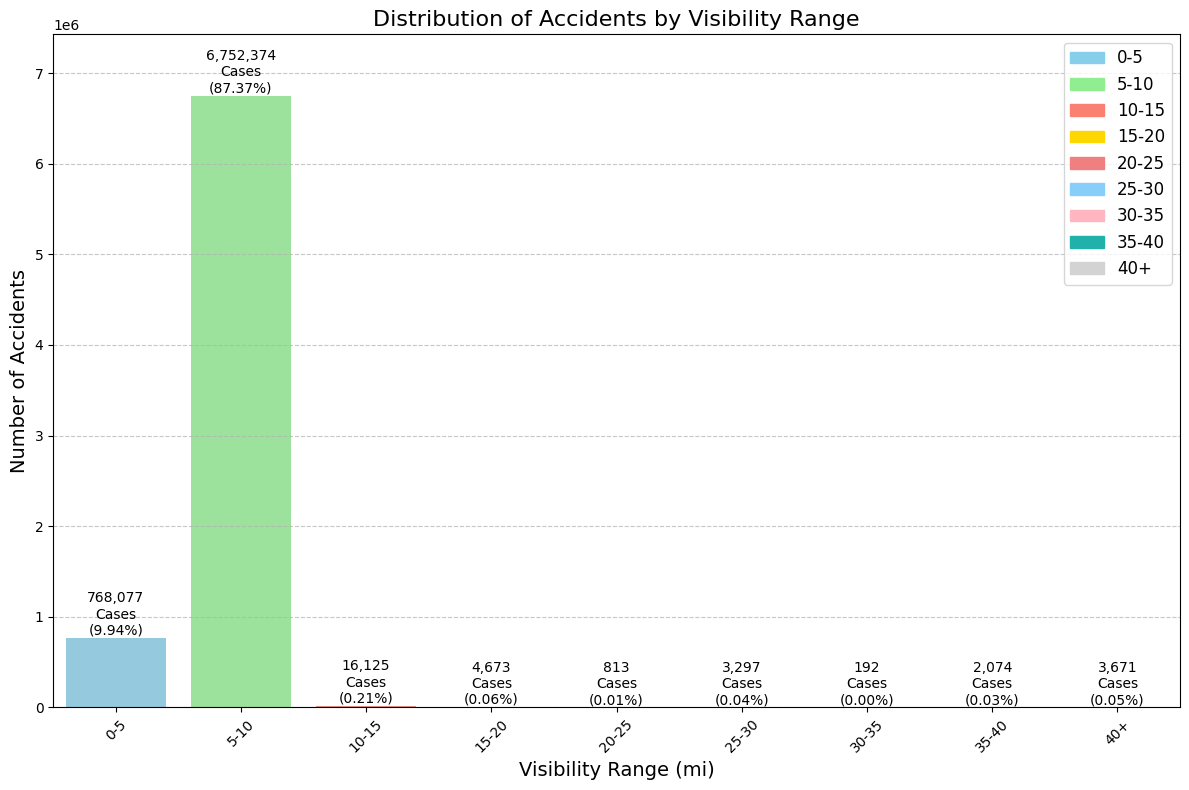

In [26]:
intervals = [0, 5, 10, 15, 20, 25, 30, 35, 40, data['Visibility(mi)'].max()]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40+']

# Categorize 'Visibility(mi)' into custom ranges
data['Visibility_Range'] = pd.cut(data['Visibility(mi)'], bins=intervals, labels=labels, include_lowest=True)

# Count accidents in each visibility range
visibility_counts = data['Visibility_Range'].value_counts().sort_index()

# Define custom colors for each visibility range
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue', 'lightpink', 'lightseagreen', 'lightgrey']

# Plotting the data
plt.figure(figsize=(12, 8))

bars = sns.barplot(x=visibility_counts.index, y=visibility_counts.values, palette=colors)

# Adding annotations (numbers) above each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             '{:,}\nCases\n({:.2f}%)'.format(int(bar.get_height()), bar.get_height() / len(data) * 100),
             ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.title('Distribution of Accidents by Visibility Range', fontsize=16)
plt.xlabel('Visibility Range (mi)', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, visibility_counts.max() * 1.1)  # Adjust y-axis limits for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding legend for colors
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=legend_patches, loc='upper right', fontsize=12)

# Show plot
plt.show()

C:\Users\SAMRIDHI DANGAYACH\AppData\Local\Temp\ipykernel_17768\2218300750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=colors)


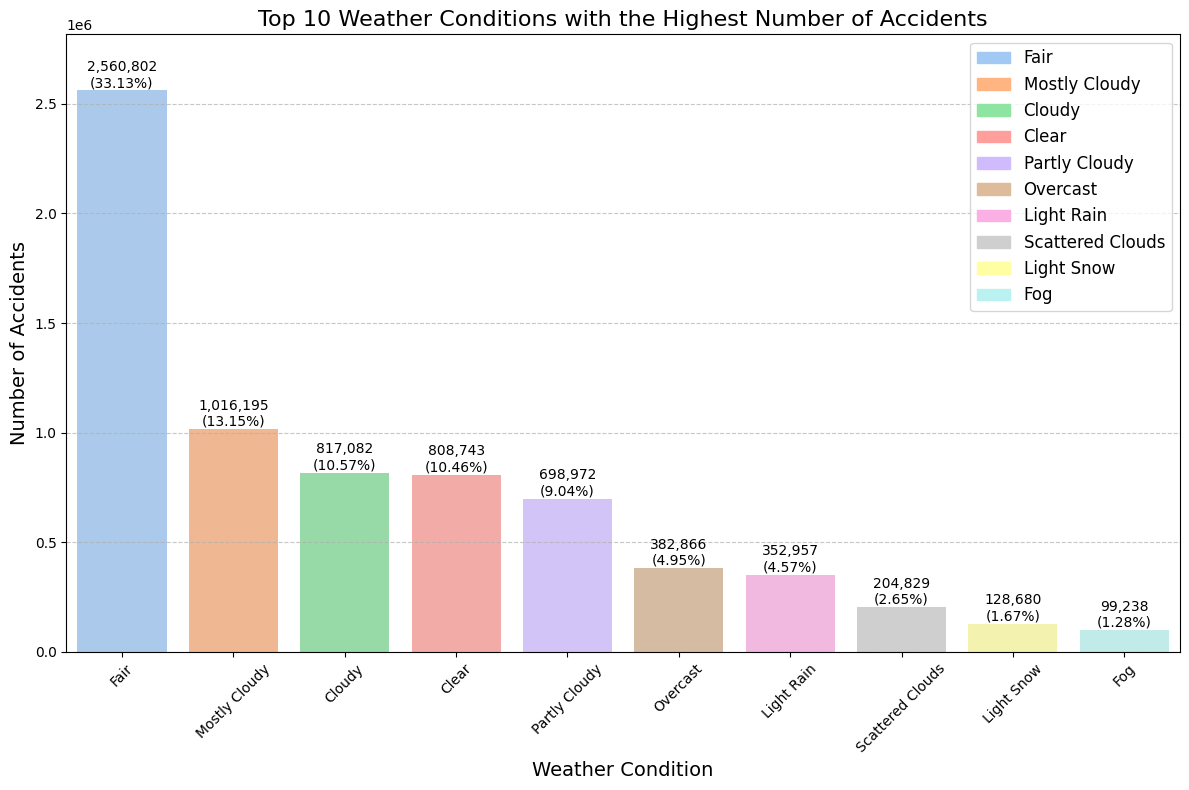

In [27]:
weather_counts = data['Weather_Condition'].value_counts().nlargest(10)

total_accidents = len(data)
weather_percentages = (weather_counts / total_accidents) * 100

colors = sns.color_palette('pastel', len(weather_counts))

plt.figure(figsize=(12, 8))

bars = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=colors)

for bar, count, percent in zip(bars.patches, weather_counts, weather_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'{int(count):,}\n({percent:.2f}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Weather Conditions with the Highest Number of Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, weather_counts.max() * 1.1)  # Adjust y-axis limits for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, weather_counts.index)]
plt.legend(handles=legend_patches, loc='upper right', fontsize=12)
plt.show()